# Primary Data Exploration

This is a quick documentation of some of the top line glances at the data set now that it's all cleaned up

In [1]:
## import working modules
import pandas as pd
import numpy as np
import glob
import os
import unicodedata
from datetime import datetime
from functools import reduce
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import seaborn as sb
import researchpy as rp
from scipy import stats

In [2]:
## import our now cleaned flat file, remind ourselves what it looks like

player_data = pd.read_csv('Combined_Player_Data.csv')
player_data.head()

,Unnamed: 0,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,...,Birth_Country,Nationality,Height_(in),Weight_(lbs),Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points
0,0,Aaron Ness,2014,NYI,D,20,275.250000,1,2,100.0,...,USA,USA,70,184,2008.0,NYI,2.0,10.0,40.0,25.80
1,1,Aaron Palushaj,2014,CAR,R,2,17.516667,0,0,0.0,...,USA,USA,72,187,2007.0,STL,2.0,14.0,44.0,0.95
2,2,Aaron Rome,2014,DAL,D,25,301.200000,0,1,10.0,...,CAN,CAN,73,220,2002.0,L.A,4.0,8.0,104.0,27.50
3,3,Aaron Volpatti,2014,WSH,L,41,300.183333,2,0,50.0,...,CAN,CAN,72,215,1900.0,Undrafted,100.0,100.0,1000.0,32.25
4,4,Adam Almquist,2014,DET,D,2,31.516667,1,0,50.0,...,SWE,SWE,71,174,2009.0,DET,7.0,29.0,210.0,3.45


In [3]:
## this data set is.... impossibly long, so here we'll pick a few key metrics that will likely pop to visualize and
## a few more just for counts
player_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Columns: 238 entries, Unnamed: 0 to Fantasy Points
dtypes: float64(202), int64(28), object(8)
memory usage: 8.1+ MB


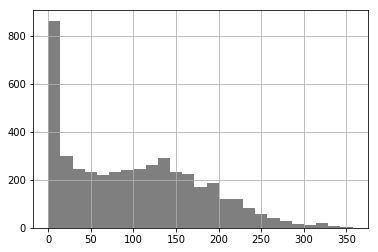

In [4]:
## here I'll map a few of the basic stats as well as essential values

player_data['Fantasy Points'].hist(color='k', alpha=0.5, bins=25)

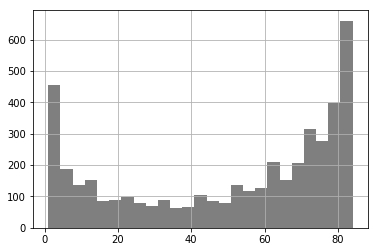

In [5]:
## big grouping at fewer than 50 pt and around 125, then a long tail off to the superstars above 300
## what about games played?
player_data['GP'].hist(color='k', alpha=0.5, bins=25)


In [6]:
## much more bimodal, I'm considering dropping everyone with fewer than 20, how many would that be?

player_data[['GP']].agg(['mean', 'std'])

## noting that with the sd at 29 gp, that would mark 20 perfectly
## this jives since 25 games played is the cut off for the nhl to count as a full rookie season
## (inside baseball: teams will bring up young players for trial basis and send back if they either 
## think they're not ready or want to aviod having that first year hit on their contract)

,GP
mean,50.147840
std,29.053064


In [7]:
## that said this does drop almost a full quarter of our entries, which has a pretty large trade off
player_data['GP'][player_data['GP'] < 20].count()



1077

In [8]:
player_data['GP'][player_data['GP'] < 10].count()

731

In [9]:
player_data['GP'][player_data['GP'] < 5].count()

455

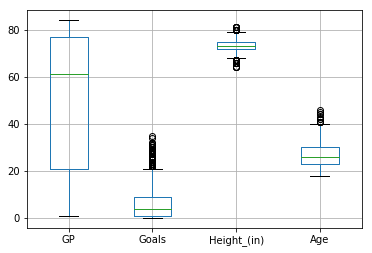

In [10]:
## lets make some fun box plots
## some game specific terminology: GF_60 = 'goals per 60 minutes played', TOI_SIndC = 'time on ice, 5 v 5'
## iCF_PPIndC = 'independant Corsi For',  iFF_PPIndC = 'independant fenwick for', Corsi and fewick are shot metrics

player_data[['GP','Goals', 'Height_(in)', 'Age',]].boxplot()


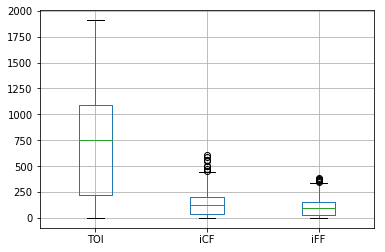

In [11]:
## larger values

player_data[['TOI', 'iCF','iFF']].boxplot()



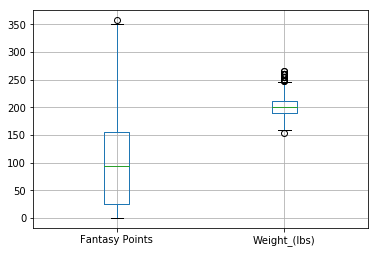

In [12]:
## medium values

player_data[['Fantasy Points','Weight_(lbs)']].boxplot()



In [13]:
## wild shot in the dark that the player above 350 is Ovechkin

player_data[player_data['Fantasy Points']>300].sort_values(['Fantasy Points'], ascending=False)

,Unnamed: 0,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,...,Birth_Country,Nationality,Height_(in),Weight_(lbs),Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points
778,778,Sidney Crosby,2014,PIT,C,80,1373.366667,25,41,81.48,...,CAN,CAN,71,200,2005.0,PIT,1.0,1.0,1.0,357.35
905,905,Alex Ovechkin,2015,WSH,L,81,1334.750000,28,19,71.21,...,RUS,RUS,75,235,2004.0,WSH,1.0,1.0,1.0,349.90
3755,3755,Connor McDavid,2018,EDM,C,82,1433.650000,35,49,88.42,...,CAN,CAN,73,193,2015.0,EDM,1.0,1.0,1.0,342.30
3626,3626,Anze Kopitar,2018,L.A,C,82,1395.500000,28,35,77.78,...,SVN,SVN,75,225,2005.0,L.A,1.0,11.0,11.0,341.60
2125,2125,Jamie Benn,2016,DAL,L,82,1251.850000,22,32,72.00,...,CAN,CAN,74,205,2007.0,DAL,5.0,8.0,129.0,338.00
733,733,Ryan Getzlaf,2014,ANA,C,77,1188.183333,26,38,82.05,...,CAN,CAN,76,225,2003.0,ANA,1.0,19.0,19.0,338.00
3444,3444,Sidney Crosby,2017,PIT,C,75,1210.083333,30,34,82.05,...,CAN,CAN,71,200,2005.0,PIT,1.0,1.0,1.0,332.85
4410,4410,Vincent Trocheck,2018,FLA,C,82,1317.433333,15,29,68.75,...,USA,USA,70,186,2011.0,FLA,3.0,3.0,64.0,332.35
4324,4324,Sidney Crosby,2018,PIT,C,82,1376.133333,20,31,72.86,...,CAN,CAN,71,200,2005.0,PIT,1.0,1.0,1.0,331.50
2550,2550,Sidney Crosby,2016,PIT,C,80,1308.800000,26,35,81.33,...,CAN,CAN,71,200,2005.0,PIT,1.0,1.0,1.0,328.60


In [14]:
## apparently I was wrong, Ovie missed being above 350 by .2 points
## that said this is an interesting barometer for the top 10 of players
## with Ovie and Crosby having the most appearances, Crosby appearing every year that's measured
## not shown here, this current season he's on track for 377, as is Ovechkin. Both players are in 
## their 14th season, which again, just shows what insanely talented outliers they are
player_data[player_data['Fantasy Points']>300].groupby("Player")["Player"].count().sort_values( ascending=False)

Player
Sidney Crosby        5
Jamie Benn           4
Alex Ovechkin        4
Claude Giroux        3
Joe Pavelski         3
Erik Karlsson        2
Brent Burns          2
John Tavares         2
Connor McDavid       2
Anze Kopitar         1
Blake Wheeler        1
Vincent Trocheck     1
Evgeni Malkin        1
Tyler Seguin         1
Nathan MacKinnon     1
Patrice Bergeron     1
Patrick Kane         1
Ryan Getzlaf         1
Taylor Hall          1
Aleksander Barkov    1
Name: Player, dtype: int64

In [15]:
list(player_data.columns)

['Unnamed: 0',
 'Player',
 'Year',
 'Team',
 'Position',
 'GP',
 'TOI',
 'Goals',
 'Total_Assists',
 'IPP',
 'Shots',
 'SHPer',
 'iCF',
 'iFF',
 'iSCF',
 'iHDCF',
 'Rush_Attempts',
 'Rebounds_Created',
 'PIM',
 'Total_Penalties',
 'Minor',
 'Major',
 'Misconduct',
 'Penalties_Drawn',
 'Giveaways',
 'Takeaways',
 'Hits',
 'Hits_Taken',
 'Shots_Blocked',
 'Faceoffs_Won',
 'Faceoffs_Lost',
 'Faceoffs_Per',
 'TOI_PPIndC',
 'Goals_PPIndC',
 'Total_Assists_PPIndC',
 'IPP_PPIndC',
 'Shots_PPIndC',
 'SHPer_PPIndC',
 'iCF_PPIndC',
 'iFF_PPIndC',
 'iSCF_PPIndC',
 'iHDCF_PPIndC',
 'Rush_Attempts_PPIndC',
 'Rebounds_Created_PPIndC',
 'PIM_PPIndC',
 'Total_Penalties_PPIndC',
 'Minor_PPIndC',
 'Major_PPIndC',
 'Misconduct_PPIndC',
 'Penalties_Drawn_PPIndC',
 'Giveaways_PPIndC',
 'Takeaways_PPIndC',
 'Hits_PPIndC',
 'Hits_Taken_PPIndC',
 'Shots_Blocked_PPIndC',
 'Faceoffs_Won_PPIndC',
 'Faceoffs_Lost_PPIndC',
 'Faceoffs_Per_PPIndC',
 'TOI_PkIndC',
 'Goals_PkIndC',
 'Total_Assists_PkIndC',
 'IPP_PkInd

In [16]:
pd.option_context('display.max_rows', None)

In [17]:
## lets check out the drafted vs undrafted numbers

player_data['drafted']=np.where(player_data['Overall_Draft_Position']==1000, 0, 1)

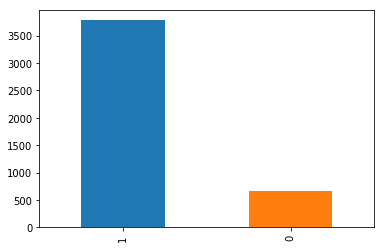

In [18]:
pd.value_counts(player_data['drafted']).plot.bar()

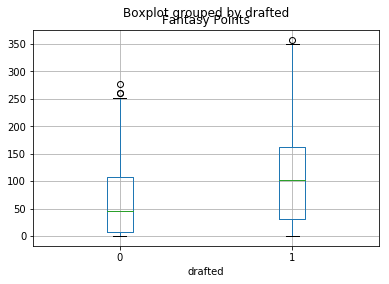

In [19]:
player_data.boxplot(column='Fantasy Points',by='drafted')
## add labels
## t-test on said groups

In [20]:
## while the undrafted group is a lot smaller they have a lot lower bounds on their potential 
## lets do some more descriptive things by this and by position

player_data.groupby("Position")['Fantasy Points'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
C,1252.0,110.033107,87.092646,0.00,25.4500,102.925,174.9250,357.35
"C, L",52.0,135.097115,65.955875,10.95,80.0375,128.925,194.5875,274.15
"C, R",30.0,140.131667,56.783126,28.95,100.6750,151.275,182.1250,239.00
D,1521.0,95.785043,70.669238,0.00,29.5000,94.050,148.5500,321.60
"D, R",1.0,2.600000,NaN,2.60,2.6000,2.600,2.6000,2.60
L,834.0,91.337950,75.391500,0.00,19.8875,84.050,146.1375,349.90
"L, R",14.0,117.228571,75.300344,1.00,59.6125,146.975,159.2625,222.45
R,740.0,92.999189,75.060902,0.00,22.5625,83.675,147.1500,320.50


In [21]:
## I'm reasonably sure that D, R player is an encoding error somewhere...
player_data[player_data['Position']== 'D, R']

,Unnamed: 0,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,...,Nationality,Height_(in),Weight_(lbs),Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,drafted
2278,2278,Luke Witkowski,2016,T.B,"D, R",4,28.516667,0,0,0.0,...,USA,74,210,2008.0,T.B,6.0,9.0,160.0,2.6,1


according to wikipedia, it is not an error, but he is a [scrub with questionable judgement](https://en.wikipedia.org/wiki/Luke_Witkowski#Detroit_Red_Wings) (that's the scientific term)

In [22]:
## more summary stats
rp.summary_cont(player_data.groupby("Position")['Fantasy Points'])

,N,Mean,SD,SE,95% Conf.,Interval
Position,,,,,,
C,1252,110.033107,87.092646,2.461384,105.206867,114.859347
"C, L",52,135.097115,65.955875,9.146434,116.995202,153.199028
"C, R",30,140.131667,56.783126,10.367133,119.464718,160.798616
D,1521,95.785043,70.669238,1.812032,92.232292,99.337793
"D, R",1,2.600000,NaN,NaN,NaN,NaN
L,834,91.337950,75.391500,2.610594,86.218115,96.457785
"L, R",14,117.228571,75.300344,20.124863,76.294838,158.162305
R,740,92.999189,75.060902,2.759294,87.587316,98.411063


In [23]:
## creating ppg rating 
player_data['Fantasy Points Per Game'] = round(player_data['Fantasy Points'] / player_data['GP'], 2)


## pull into smaller groups, forwards, centers, and D 
Forwards = player_data[(player_data["Position"] == 'L')|(player_data["Position"] == 'L, R')|(player_data["Position"] == 'R')]
Forwards.reset_index(inplace= True)

Centers = player_data[(player_data["Position"] == 'C')|(player_data["Position"] == 'C, L')|(player_data["Position"] == 'C, R')]
Centers.reset_index(inplace= True)

Defensemen = player_data[(player_data["Position"] == 'D')|(player_data["Position"] == 'D, R')]
Centers.reset_index(inplace= True)

In [24]:
Forwards

,index,Unnamed: 0,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,...,Height_(in),Weight_(lbs),Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,drafted,Fantasy Points Per Game
0,1,1,Aaron Palushaj,2014,CAR,R,2,17.516667,0,0,...,72,187,2007.0,STL,2.0,14.0,44.0,0.95,1,0.48
1,3,3,Aaron Volpatti,2014,WSH,L,41,300.183333,2,0,...,72,215,1900.0,Undrafted,100.0,100.0,1000.0,32.25,0,0.79
2,5,5,Adam Burish,2014,S.J,R,15,125.383333,0,0,...,73,195,2002.0,CHI,9.0,22.0,282.0,13.10,1,0.87
3,6,6,Adam Cracknell,2014,STL,R,19,151.050000,0,2,...,74,209,2004.0,CGY,9.0,21.0,279.0,18.35,1,0.97
4,7,7,Adam Hall,2014,PHI,R,80,544.033333,2,5,...,74,212,1999.0,NSH,2.0,24.0,52.0,89.95,1,1.12
5,15,15,Ales Hemsky,2014,"EDM, OTT",R,75,1006.350000,11,18,...,72,177,2001.0,EDM,1.0,13.0,13.0,142.50,1,1.90
6,16,16,Alex Chiasson,2014,DAL,R,79,884.716667,7,15,...,76,208,2009.0,DAL,2.0,8.0,38.0,134.85,1,1.71
7,21,21,Alex Killorn,2014,T.B,L,82,1206.400000,14,19,...,73,196,2007.0,T.B,3.0,16.0,77.0,157.60,1,1.92
8,22,22,Alex Ovechkin,2014,WSH,L,78,1204.216667,27,12,...,75,235,2004.0,WSH,1.0,1.0,1.0,325.60,1,4.17
9,25,25,Alex Tanguay,2014,COL,L,16,217.966667,3,5,...,73,194,1998.0,COL,1.0,12.0,12.0,36.95,1,2.31


In [25]:
## looking 
stats.levene(Forwards['Fantasy Points'], Centers['Fantasy Points'], Defensemen['Fantasy Points'])


LeveneResult(statistic=35.223870430583496, pvalue=6.645566842920892e-16)

In [26]:
## that is a crazy small pvalue, 

forwardsdif = Forwards['Fantasy Points'] - Centers['Fantasy Points']

Text(0.5, 0, 'Fantasy Points')

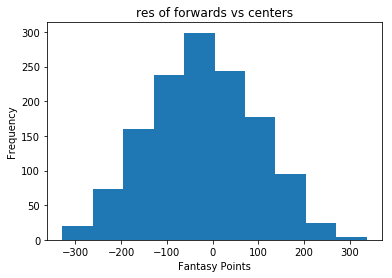

In [27]:
forwardsdif.plot(kind= "hist", title= "res of forwards vs centers")
plt.xlabel("Fantasy Points")


In [28]:
## t-test
stats.ttest_ind(Forwards['Fantasy Points'],Centers['Fantasy Points'])


Ttest_indResult(statistic=-6.4847374350192135, pvalue=1.0400087493896592e-10)

In [29]:
## I theorize that time on ice per game probably is also indicative of the value of a player
## This was recently affirmed at 

player_data['TOI_GP']

0       14.794167
1        9.325000
2       13.088000
3        7.362602
4       17.216667
5        9.620000
6        8.181579
7        9.838542
8       18.054329
9       17.784615
10      16.047778
11      14.420833
12       9.150000
13      15.687432
14      17.097531
15      15.958444
16      15.114135
17      14.395128
18      24.313374
19      12.175000
20      15.233333
21      16.778862
22      20.545299
23      12.235714
24      25.359054
25      17.246875
26      23.286508
27      19.909744
28      20.281373
29      18.125333
          ...    
4414    19.057083
4415     8.822222
4416    17.087654
4417     8.350000
4418    11.925000
4419    18.087556
4420    16.062757
4421     9.416667
4422     8.840991
4423    18.716870
4424    16.688415
4425    13.857778
4426    16.157927
4427    12.057447
4428    13.555556
4429     7.441667
4430    11.283962
4431    11.376042
4432    19.156481
4433    17.357724
4434    17.082937
4435    14.477778
4436    12.783333
4437    22.575974
4438    16

let's compare avg time vs avg ppg

In [30]:
## t-test
stats.ttest_ind(player_data['Fantasy Points Per Game'],player_data['TOI_GP'])



Ttest_indResult(statistic=-197.26394026587084, pvalue=0.0)

I've never seen a p-value that's literally 0

In [31]:
player_data.corr(method='pearson')

,Unnamed: 0,Year,GP,TOI,Goals,Total_Assists,IPP,Shots,SHPer,iCF,...,Age,Height_(in),Weight_(lbs),Draft_Year,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,drafted,Fantasy Points Per Game
Unnamed: 0,1.000000,0.979792,0.011587,0.014131,0.044033,0.040981,0.012217,0.042296,0.026396,0.037174,...,-0.051695,-0.033866,-0.081500,0.052955,-0.021000,-0.015199,-0.025819,0.023025,0.018719,0.027124
Year,0.979792,1.000000,0.012388,0.015788,0.039834,0.038170,0.002740,0.039192,0.018217,0.036266,...,-0.047919,-0.023543,-0.076355,0.049694,-0.017116,-0.013544,-0.021302,0.021696,0.015220,0.022682
GP,0.011587,0.012388,1.000000,0.935416,0.655141,0.773081,0.363268,0.843519,0.184745,0.857531,...,0.248377,0.026351,0.093839,0.154834,-0.188542,-0.195490,-0.204393,0.868733,0.180870,0.579444
TOI,0.014131,0.015788,0.935416,1.000000,0.605683,0.809326,0.228078,0.837453,0.129742,0.888209,...,0.214740,0.058267,0.107165,0.162118,-0.194520,-0.208484,-0.214532,0.901212,0.185304,0.662317
Goals,0.044033,0.039834,0.655141,0.605683,1.000000,0.743448,0.507639,0.842346,0.420074,0.780592,...,0.064382,-0.070047,-0.025187,0.162397,-0.182157,-0.194992,-0.207937,0.798784,0.170559,0.686126
Total_Assists,0.040981,0.038170,0.773081,0.809326,0.743448,1.000000,0.413201,0.830299,0.216935,0.827931,...,0.136476,-0.031180,0.005805,0.167383,-0.194536,-0.210943,-0.218966,0.898010,0.183533,0.749875
IPP,0.012217,0.002740,0.363268,0.228078,0.507639,0.413201,1.000000,0.416665,0.487211,0.347553,...,0.034266,-0.158349,-0.095442,0.088933,-0.101481,-0.101168,-0.115581,0.364111,0.094756,0.438138
Shots,0.042296,0.039192,0.843519,0.837453,0.842346,0.830299,0.416665,1.000000,0.213177,0.978089,...,0.128003,-0.019722,0.042779,0.186878,-0.213415,-0.228984,-0.239093,0.902202,0.201740,0.709972
SHPer,0.026396,0.018217,0.184745,0.129742,0.420074,0.216935,0.487211,0.213177,1.000000,0.176122,...,0.002916,-0.084903,-0.070356,0.048129,-0.053740,-0.049545,-0.064034,0.236553,0.048910,0.382967
iCF,0.037174,0.036266,0.857531,0.888209,0.780592,0.827931,0.347553,0.978089,0.176122,1.000000,...,0.130113,0.010062,0.069312,0.183599,-0.209997,-0.225464,-0.235214,0.911318,0.198549,0.714986


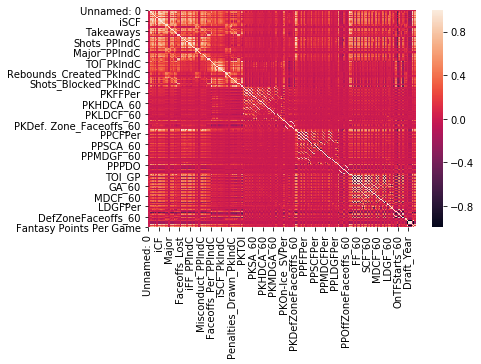

In [33]:
## fun but messy plotting
corr = player_data.corr(method='pearson')
sb.heatmap(corr)

what stands out to me here is that corsi (iCF), fenwick (iFF), and time on ice (metrics with TOI) all coorelate better than values that I'd have guessed would be way more predictive, such as assists or goals, which are actually included in the metric. Also interesting is the negative corralation from Draft Position, which I'd have assumed would be similar in value to TOI. 

Someplace in between is the values against players (GA_60 = Goals against the player over 60 min, SA_60 shots against the player's team, etc) also have a negative correlation. While I wouldn't have expected a massive link, negative is a bit surprising. My thesis on this (which will go unexplored here because it would be a much different project) is that players work harder if they're doing poorly defensively or playing from behind frequently. 

In [48]:

sorted_fantasy_value = corr.iloc[:,-3].sort_values(ascending = False)
sorted_fantasy_value.iloc[0:50,]

Fantasy Points             1.000000
TOI_SIndR                  0.918613
iCF                        0.911318
iFF                        0.909016
Shots                      0.902202
TOI                        0.901212
Total_Assists              0.898010
GP                         0.868733
Fantasy Points Per Game    0.833590
TOI_PPIndC                 0.822900
PPTOI                      0.822900
iSCF                       0.817299
Rebounds_Created           0.809625
Takeaways                  0.807529
Goals                      0.798784
Shots_PPIndC               0.770936
Giveaways                  0.763187
iSCF_PPIndC                0.749924
Total_Assists_PPIndC       0.730277
Penalties_Drawn            0.714902
iFF_PPIndC                 0.711917
TOI_GP                     0.704912
Goals_PPIndC               0.699225
iCF_PPIndC                 0.698013
Rush_Attempts              0.695557
PPTOI_GP                   0.694804
Hits_Taken                 0.694542
iHDCF                      0

In [49]:
sorted_fantasy_value.iloc[200:,]

PKOff. Zone_Faceoff_Per    0.010745
PPMDCA_60                  0.008416
PKOff. Zone_Faceoffs_60    0.007254
PPSA_60                    0.006121
HDGA_60                    0.006109
MDCA_60                    0.005688
PKOnTFStarts_60            0.002431
PKOn-Ice_SVPer             0.001406
PKMDGA_60                  0.000055
PKOn-Ice_SHPer            -0.002738
LDGA_60                   -0.002956
Neu. Zone_Faceoffs_60     -0.003521
PPLDGA_60                 -0.007144
SCA_60                    -0.013822
PPLDCA_60                 -0.017557
PPOn-Ice_SVPer            -0.023794
HDCA_60                   -0.030345
PPOff. Zone_Faceoffs_60   -0.049501
On-Ice_SVPer              -0.051994
PPDefZoneFaceoffs_60      -0.057124
PPDef. Zone_Faceoffs_60   -0.061109
PPNeu. Zone_Faceoffs_60   -0.080217
PPNeuZoneFaceoffs_60      -0.081164
SA_60                     -0.098172
FA_60                     -0.103418
CA_60                     -0.112889
LDCA_60                   -0.153180
PPOnTFStarts_60           -0

In [70]:
sorted_fantasy_value.loc['drafted']

0.19544385546455234

So the correlation to drafted is very slight but does exist. Just to make sure this wasn't from the alteration I made in the data munging of creating false numeric values for the undrafted players, I recreated the frame without the undrafted players and rechecked the correlations.

In [67]:
draft_index = (player_data['drafted'] == 1) 
drafted_players = player_data[draft_index]
dcorr = drafted_players.corr(method='pearson')
drafted_fantasy_value = dcorr.iloc[:,-3].sort_values(ascending = False)
drafted_fantasy_value.iloc[0:50,]

Fantasy Points             1.000000
TOI_SIndR                  0.912436
iCF                        0.905267
iFF                        0.903328
Shots                      0.896437
TOI                        0.893858
Total_Assists              0.893691
GP                         0.861051
Fantasy Points Per Game    0.841697
TOI_PPIndC                 0.824445
PPTOI                      0.824445
iSCF                       0.810172
Rebounds_Created           0.799959
Takeaways                  0.796346
Goals                      0.793565
Shots_PPIndC               0.773290
iSCF_PPIndC                0.749177
Giveaways                  0.746506
Total_Assists_PPIndC       0.731705
iFF_PPIndC                 0.722702
iCF_PPIndC                 0.708165
Penalties_Drawn            0.705307
TOI_GP                     0.700119
Goals_PPIndC               0.699322
PPTOI_GP                   0.696209
Rush_Attempts              0.688533
iHDCF                      0.687670
Hits_Taken                 0

In [68]:
drafted_fantasy_value.loc['Draft_Round']


-0.22545016611316257

In [69]:
drafted_fantasy_value.loc['Overall_Draft_Position']

-0.23538558895284944

interestingly that stays almost the exact same, Overall Postion went from -0.232 to -0.235, while Draft_Round went from -0.207 to -0.225. I'd say that means it's safe to use the whole data set, and since I won't use the negative values, or the drafted value, it's fine to ignore that grouping. Still surprising how little impact it has over all. Just for fun I'm mapping out the draft value vs fantasy points here. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


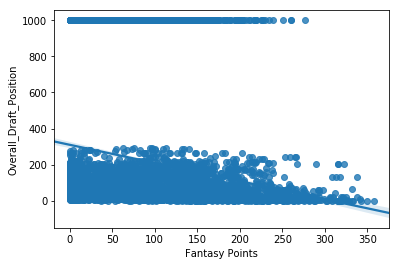

In [79]:

sb.regplot(player_data['Fantasy Points'],player_data['Overall_Draft_Position'])


That looks terrible due to the undrafted players. running it again with just the drafted folks is somewhat better but you can still see the lack of real correlation pretty quickly.

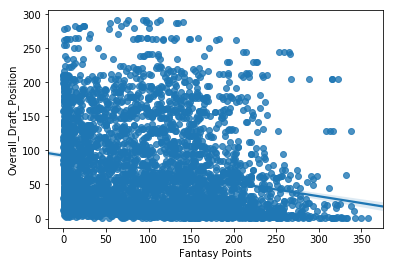

In [80]:
sb.regplot(drafted_players['Fantasy Points'],drafted_players['Overall_Draft_Position'])



Ok, enough of the things that don't correlate, that's test some that are. 

I'm going to look values that are above .8 and aren't directly scored in fantasy value creation. That leaves us with:

     TOI_SIndR                  0.918613
     iCF                        0.911318
     iFF                        0.909016
     TOI                        0.901212
     GP                         0.868733
     TOI_PPIndC                 0.822900
     PPTOI                      0.822900
     iSCF                       0.817299
     Rebounds_Created           0.809625
     Takeaways                  0.807529

This is a nice even 10 values; I think you could make a good argument that games played is a junk value in some ways since of course a higher number of games played is going to result in a higher total on average, but you can't particularly control for that or predict it given the nature of injuries. I'm going to leave it in there at the moment, but might remove it later on. I'd probably drop it overall if there weren't so few values above 80, and only 4 above 90, but the fact that it's 5th highest does raise some flags.

In [83]:
high_valued = player_data[['Player','Year','Team','Fantasy Points','TOI_SIndR',"iCF","iFF","TOI","GP", "TOI_PPIndC", "PPTOI", "iSCF", "Rebounds_Created", "Takeaways"]]
high_valued.sort_values(by='Fantasy Points', ascending = False)

In [85]:
high_valued.sort_values(by='Fantasy Points', ascending = False)

,Player,Year,Team,Fantasy Points,TOI_SIndR,iCF,iFF,TOI,GP,TOI_PPIndC,PPTOI,iSCF,Rebounds_Created,Takeaways
778,Sidney Crosby,2014,PIT,357.35,1757.783333,305,250,1373.366667,80,343.033333,343.033333,195,20,38
905,Alex Ovechkin,2015,WSH,349.90,1646.400000,558,390,1334.750000,81,309.266667,309.266667,269,24,42
3755,Connor McDavid,2018,EDM,342.30,1766.800000,358,301,1433.650000,82,243.016667,243.016667,275,25,100
3626,Anze Kopitar,2018,L.A,341.60,1810.966667,261,199,1395.500000,82,236.700000,236.700000,159,15,49
2125,Jamie Benn,2016,DAL,338.00,1641.800000,316,247,1251.850000,82,261.200000,261.200000,201,19,57
733,Ryan Getzlaf,2014,ANA,338.00,1638.966667,248,197,1188.183333,77,282.033333,282.033333,140,19,36
3444,Sidney Crosby,2017,PIT,332.85,1490.833333,307,239,1210.083333,75,271.066667,271.066667,200,26,39
4410,Vincent Trocheck,2018,FLA,332.35,1751.866667,338,284,1317.433333,82,285.100000,285.100000,173,20,50
4324,Sidney Crosby,2018,PIT,331.50,1696.516667,312,258,1376.133333,82,299.250000,299.250000,201,21,38
2550,Sidney Crosby,2016,PIT,328.60,1637.550000,329,254,1308.800000,80,296.883333,296.883333,192,21,38


In [89]:
stats.ttest_ind(high_valued['Fantasy Points'],high_valued['TOI_SIndR'])

Ttest_indResult(statistic=-83.38713433581239, pvalue=0.0)

In [128]:
for i in high_valued.iloc[:, 4:]:
    print(i+"   :    ", stats.ttest_ind(high_valued['Fantasy Points'],high_valued[i]))

TOI_SIndR   :     Ttest_indResult(statistic=-83.38713433581239, pvalue=0.0)
iCF   :     Ttest_indResult(statistic=-16.407521106640285, pvalue=1.2655513711812856e-59)
iFF   :     Ttest_indResult(statistic=1.4719473746068694, pvalue=0.1410705031398806)
TOI   :     Ttest_indResult(statistic=-84.1009251212936, pvalue=0.0)
GP   :     Ttest_indResult(statistic=39.55693024909682, pvalue=0.0)
TOI_PPIndC   :     Ttest_indResult(statistic=15.522519852453456, pvalue=1.2315595656258326e-53)
PPTOI   :     Ttest_indResult(statistic=15.522519852518698, pvalue=1.231559564406494e-53)
iSCF   :     Ttest_indResult(statistic=28.25137678974906, pvalue=3.1754817960054516e-168)
Rebounds_Created   :     Ttest_indResult(statistic=78.96938007509733, pvalue=0.0)
Takeaways   :     Ttest_indResult(statistic=70.13308825204936, pvalue=0.0)


In [135]:
from math import sqrt
from scipy.stats import t
# Run independent t-test
ind_t_test = stats.ttest_ind(high_valued['Fantasy Points'],high_valued['TOI_SIndR'])

# Calculate the mean difference and 95% confidence interval
N1 = 4444
N2 = 4444
df = (N1 + N2)
std1 = high_valued['Fantasy Points'].std()
std2 = high_valued['TOI_SIndR'].std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

diff_mean = high_valued['Fantasy Points'].mean() - high_valued['TOI_SIndR'].mean()
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = -83.387
	p-value = 0.000

The difference between groups is -729.0 [-746.1 to -711.9] (mean [95% CI])


Turns out that's a jumbled mess. Let's try creating a new feature, and tuning for that. We're going to create a fantasy points per 60 measure, and then see how our results work if instead we look at fantasy points per game instead of whole season. 

In [137]:
## first we need an actual count of minutes played
player_data['Total Minutes Played'] = player_data['TOI'] + player_data['PPTOI'] + player_data['PKTOI']

player_data['FantasyPoints_60'] = player_data['Fantasy Points']/(player_data['Total Minutes Played']/60)


In [147]:
player_data[['Player', 'Year', 'Fantasy Points','Fantasy Points Per Game','FantasyPoints_60', 'Total Minutes Played']]

,Player,Year,Fantasy Points,Fantasy Points Per Game,FantasyPoints_60,Total Minutes Played
0,Aaron Ness,2014,25.80,1.29,5.231792,295.883333
1,Aaron Palushaj,2014,0.95,0.48,3.056300,18.650000
2,Aaron Rome,2014,27.50,1.10,5.042787,327.200000
3,Aaron Volpatti,2014,32.25,0.79,6.410115,301.866667
4,Adam Almquist,2014,3.45,1.72,6.011617,34.433333
5,Adam Burish,2014,13.10,0.87,5.446985,144.300000
6,Adam Cracknell,2014,18.35,0.97,7.082663,155.450000
7,Adam Hall,2014,89.95,1.12,6.862920,786.400000
8,Adam Henrique,2014,199.45,2.59,8.608217,1390.183333
9,Adam Larsson,2014,37.75,1.45,4.898356,462.400000


In [146]:
player_data[['Player', 'Year', 'Fantasy Points','Fantasy Points Per Game','FantasyPoints_60', 'Total Minutes Played']].mean()

Year                       2016.003150
Fantasy Points               99.306604
Fantasy Points Per Game       1.719631
FantasyPoints_60              6.811712
Total Minutes Played        828.187841
dtype: float64

In [165]:
player_data[['Player', 'Year', 'Fantasy Points','Fantasy Points Per Game','FantasyPoints_60', 'Total Minutes Played']].sort_values(by = ['FantasyPoints_60','Fantasy Points','FantasyPoints_60'],ascending = False)

,Player,Year,Fantasy Points,Fantasy Points Per Game,FantasyPoints_60,Total Minutes Played
3418,Samuel Henley,2017,3.60,3.60,40.754717,5.300000
1475,Miikka Salomaki,2015,5.65,5.65,31.340524,10.816667
4418,Warren Foegele,2018,10.35,5.18,26.037736,23.850000
4045,Landon Ferraro,2018,3.55,1.78,24.113208,8.833333
4232,Patrick Sieloff,2018,4.05,4.05,21.728763,11.183333
1913,Buddy Robinson,2016,8.75,2.92,20.348837,25.800000
704,Raffi Torres,2014,17.25,3.45,19.980695,51.800000
2123,James Wisniewski,2016,0.25,0.25,19.148936,0.783333
2140,Jason Dickinson,2016,3.75,3.75,18.881119,11.916667
4300,Sami Niku,2018,4.70,4.70,18.532311,15.216667


In [175]:
## lots of players who just played one game or two show up very high due to limited sample
## that said limiting to the players who have played 5 games worth of minutes we see exactly
## the kind of grouping we'd expect here, and about the same for those who played the average
## toi per game * 5
## additionally the fall off is a lot less: the bottom players still are averaging some impact

player_data[player_data['Total Minutes Played']>350].sort_values(by = ['FantasyPoints_60','Fantasy Points','FantasyPoints_60'],ascending = False)

,Unnamed: 0,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,...,Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,drafted,Fantasy Points Per Game,Total Minutes Played,FantasyPoints_60
3444,3444,Sidney Crosby,2017,PIT,C,75,1210.083333,30,34,82.05,...,2005.0,PIT,1.0,1.0,1.0,332.85,1,4.44,1490.833333,13.395864
3847,3847,Evgeni Malkin,2018,PIT,C,78,1189.450000,28,32,76.92,...,2004.0,PIT,1.0,2.0,2.0,325.80,1,4.18,1481.216667,13.197259
4172,4172,Nathan MacKinnon,2018,COL,C,74,1182.300000,27,37,81.01,...,2013.0,COL,1.0,1.0,1.0,317.35,1,4.29,1471.966667,12.935755
2956,2956,Evgeni Malkin,2017,PIT,C,62,923.416667,22,27,80.33,...,2004.0,PIT,1.0,2.0,2.0,245.45,1,3.96,1154.383333,12.757461
905,905,Alex Ovechkin,2015,WSH,L,81,1334.750000,28,19,71.21,...,2004.0,WSH,1.0,1.0,1.0,349.90,1,4.32,1646.333333,12.751974
4347,4347,Taylor Hall,2018,N.J,L,76,1225.683333,24,30,72.97,...,2010.0,EDM,1.0,1.0,1.0,307.80,1,4.05,1454.766667,12.694819
794,794,Steven Stamkos,2014,T.B,C,37,586.183333,15,11,76.47,...,2008.0,T.B,1.0,1.0,1.0,158.40,1,4.28,749.216667,12.685249
4226,4226,Patrice Bergeron,2018,BOS,C,64,935.983333,18,21,72.22,...,2003.0,BOS,2.0,15.0,45.0,262.55,1,4.10,1244.000000,12.663183
3633,3633,Auston Matthews,2018,TOR,C,62,988.733333,28,21,73.13,...,2016.0,TOR,1.0,1.0,1.0,233.35,1,3.76,1123.950000,12.456960
733,733,Ryan Getzlaf,2014,ANA,C,77,1188.183333,26,38,82.05,...,2003.0,ANA,1.0,19.0,19.0,338.00,1,4.39,1637.933333,12.381456


In [176]:
player_data['TOI_GP'].mean()

15.021315595838178

In [177]:
player_data['TOI_GP'].mean() * 5

75.10657797919089

In [178]:
player_data[player_data['Total Minutes Played']>75].sort_values(by = ['FantasyPoints_60','Fantasy Points'],ascending = False)

,Unnamed: 0,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,...,Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,drafted,Fantasy Points Per Game,Total Minutes Played,FantasyPoints_60
3456,3456,Steven Stamkos,2017,T.B,C,17,235.316667,6,7,81.25,...,2008.0,T.B,1.0,1.0,1.0,69.35,1,4.08,303.900000,13.692004
3444,3444,Sidney Crosby,2017,PIT,C,75,1210.083333,30,34,82.05,...,2005.0,PIT,1.0,1.0,1.0,332.85,1,4.44,1490.833333,13.395864
1077,1077,Colin McDonald,2015,NYI,R,18,186.633333,2,6,88.89,...,2003.0,EDM,2.0,21.0,51.0,42.00,1,2.33,189.133333,13.323934
3847,3847,Evgeni Malkin,2018,PIT,C,78,1189.450000,28,32,76.92,...,2004.0,PIT,1.0,2.0,2.0,325.80,1,4.18,1481.216667,13.197259
4172,4172,Nathan MacKinnon,2018,COL,C,74,1182.300000,27,37,81.01,...,2013.0,COL,1.0,1.0,1.0,317.35,1,4.29,1471.966667,12.935755
2956,2956,Evgeni Malkin,2017,PIT,C,62,923.416667,22,27,80.33,...,2004.0,PIT,1.0,2.0,2.0,245.45,1,3.96,1154.383333,12.757461
905,905,Alex Ovechkin,2015,WSH,L,81,1334.750000,28,19,71.21,...,2004.0,WSH,1.0,1.0,1.0,349.90,1,4.32,1646.333333,12.751974
4347,4347,Taylor Hall,2018,N.J,L,76,1225.683333,24,30,72.97,...,2010.0,EDM,1.0,1.0,1.0,307.80,1,4.05,1454.766667,12.694819
794,794,Steven Stamkos,2014,T.B,C,37,586.183333,15,11,76.47,...,2008.0,T.B,1.0,1.0,1.0,158.40,1,4.28,749.216667,12.685249
4226,4226,Patrice Bergeron,2018,BOS,C,64,935.983333,18,21,72.22,...,2003.0,BOS,2.0,15.0,45.0,262.55,1,4.10,1244.000000,12.663183


This list still makes good sense, guys like Steve Stamkos, Jeff Carter who are top of class players who had seasons cut short due to injury or the like.  The one surprise here is Colin McDonald who shows up at 3rd. Seems like he got added for a late season play off push on a hot line. Moving on to things corralating to fantasy points per game

In [180]:
player_data['Fantasy Points Per Game'].mean()

1.7196309630963107

In [181]:
player_data['Fantasy Points Per Game'].std()

0.7767389709160908

In [183]:
newCorr = player_data.corr(method = 'pearson')
sorted_fantasy_valuePG = newCorr.iloc[:,-3].sort_values(ascending = False)
sorted_fantasy_valuePG.iloc[0:50,]

Fantasy Points Per Game    1.000000
Fantasy Points             0.833590
Total_Assists              0.749875
FantasyPoints_60           0.721762
TOI_PPIndC                 0.719050
PPTOI                      0.719050
iCF                        0.714986
iFF                        0.714448
Shots                      0.709972
Shots_PPIndC               0.701855
TOI_GP                     0.701839
Total Minutes Played       0.689966
TOI_SIndR                  0.689959
Goals                      0.686126
PPTOI_GP                   0.682719
iSCF_PPIndC                0.680967
Total_Assists_PPIndC       0.665323
TOI                        0.662317
iFF_PPIndC                 0.656715
Goals_PPIndC               0.650914
iSCF                       0.649937
GF_60                      0.644537
iCF_PPIndC                 0.643192
Takeaways                  0.643104
Rebounds_Created           0.636078
Rebounds_Created_PPIndC    0.607482
Giveaways_PPIndC           0.600514
Giveaways                  0

What's interesting to me here is that the values are aproximately the same still, but the strength of correlation has dropped off. Witness the top ten values side by side with respective correlation (and direct matches removed)

| Value       | Total Points           | Points Per Game  | Points Per Game Rank |
| ------------- |:-------------:| -----:| -----:|
| TOI_SIndR     |  0.918613 | 0.689959 | 7th |
| iCF      | 0.911318     |   0.714986 | 3rd |
| iFF | 0.909016     |    0.714448 | 4th |
| TOI    |  0.901212 | 0.662317 | 10th |
| GP     | 0.868733    |   0.579444 | 21st |
| TOI_PPIndC  | 0.822900     |    0.719050 | 1st |
| iSCF      | 0.822900 | 0.649937 | 12th |
| Rebounds_Created      | 0.809625     |   0.636078 | 16th |
| Takeaways | 0.807529     |    0.643104 | 15th |


In [ ]:
 TOI_SIndR                  0.918613
 iCF                        0.911318
 iFF                        0.909016
 TOI                        0.901212
 GP                         0.868733
 TOI_PPIndC                 0.822900

 
 iSCF                       0.817299
 Rebounds_Created           0.809625
 Takeaways                  0.807529


TOI_PPIndC                 0.719050
PPTOI                      0.719050
iCF                        0.714986
iFF                        0.714448
TOI_GP                     0.701839
Total Minutes Played       0.689966
TOI_SIndR                  0.689959
PPTOI_GP                   0.682719
iSCF_PPIndC                0.680967
TOI                        0.662317
iFF_PPIndC                 0.656715
iSCF                       0.649937